# FILTROS
# Ejercicio 1:
Diseñe un filtro FIR mediante el método de ventanas (implementado por usted mismo), que permita eliminar el ruido de línea en una señal que fue muestreada a 300 Hz. Compare los resultados obtenidos con diferentes ventanas de truncado y diferentes cantidades de muestras en la respuesta al impulso.


DeltaF =  0.07460830639144492


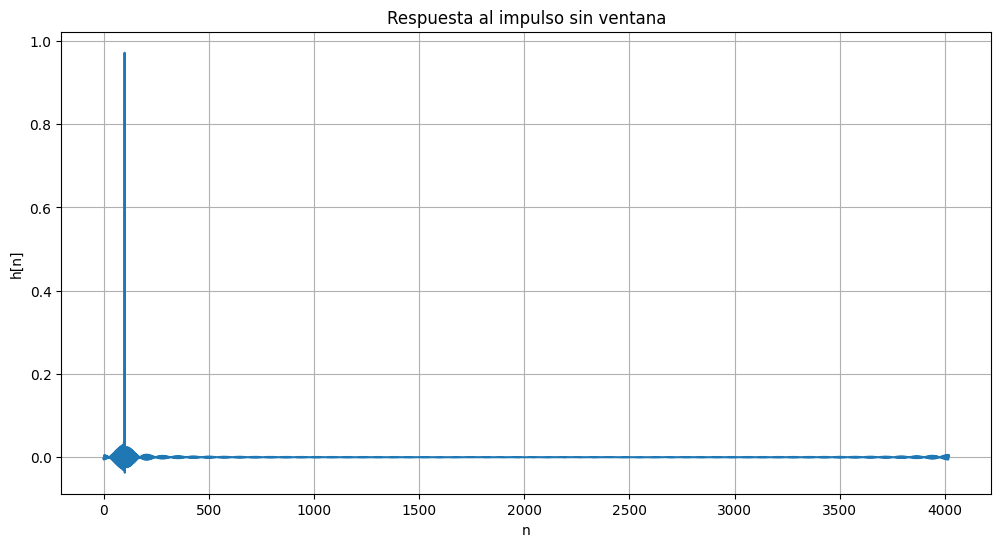

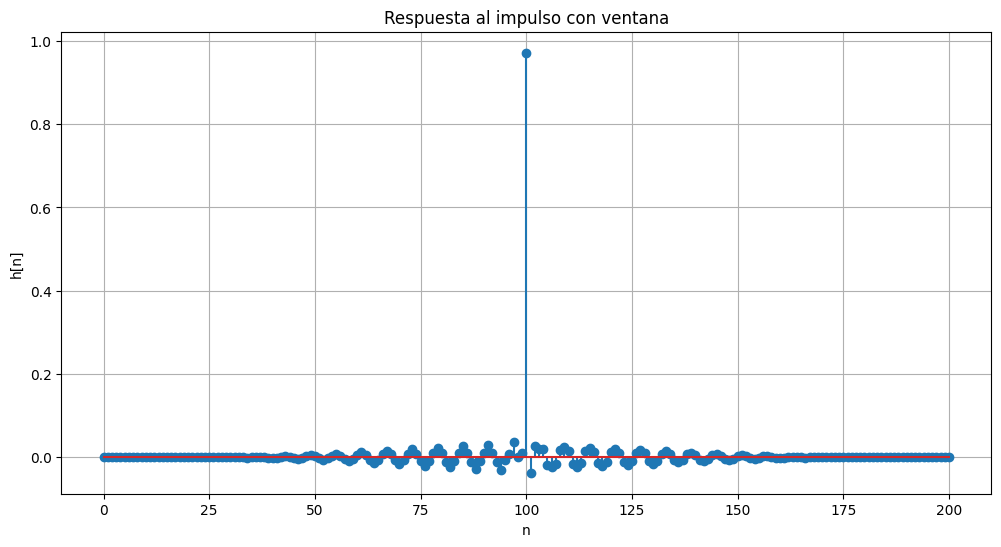

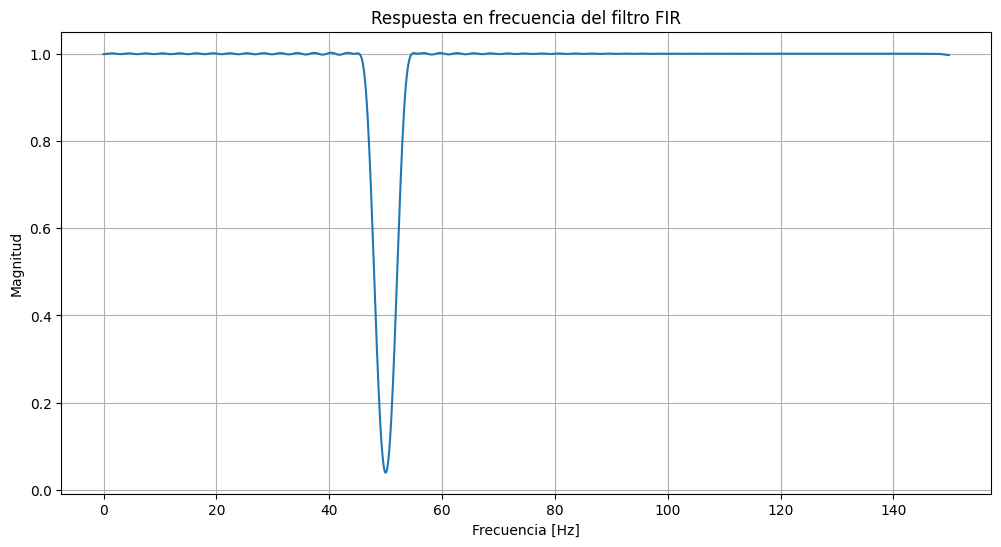

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import blackman, freqz

# Datos del enunciado
fm = 300  # Frecuencia de muestreo en Hz
fr = 50  # Frecuencia a rechazar en Hz

N = 201 # Longitud del filtro deseado 

M = 10 * N        # Longitud de la respuesta en frecuencia (positiva)
MTot = 2 * M + 1   # Total de muestras en la respuesta en frecuencia
df = fm / MTot    # Resolución frecuencial
print('DeltaF = ', df)

# Construcción de la respuesta de magnitud
MD = np.ones(M + 1)  # Parte positiva + frecuencia cero

np_idx = int(fr / df)    # Índice de la frecuencia fr

nm = int(np.ceil(2 / df))  # Ancho de banda de rechazo

# Rechazar una banda de ±2 Hz alrededor de 50 Hz
MD[np_idx - nm : np_idx + nm + 1] = 0

# Respuesta de fase (con retardo lineal de (N-1)/2)
ph = np.exp(-1j * 2 * np.pi * ((N - 1) / 2) * np.arange(M + 1) / MTot)

# Respuesta deseada para frecuencias positivas
R = MD * ph

# Añadir parte negativa (conjugada simétrica)
R_full = np.concatenate([R, np.conj(R[-2:0:-1])])  # Excluye primero y último para evitar duplicados

# Transformada inversa para obtener respuesta al impulso
h = np.real(np.fft.ifft(R_full))

# Mostrar respuesta al impulso sin ventana
plt.figure(figsize=(12,6))
plt.plot(h)
plt.title("Respuesta al impulso sin ventana")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)

# Aplicar ventana 
hf = h[:N] * np.hamming(N)
# hf = h[:N] * np.hanning(N)
# hf = h[:N] * blackman(N)

# Mostrar respuesta al impulso con ventana
plt.figure(figsize=(12,6))
plt.stem(hf)
plt.title("Respuesta al impulso con ventana")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)

# Mostrar respuesta en frecuencia
w, H = freqz(b=hf, a=1, worN=1000, fs=fm)

plt.figure(figsize=(12,6))
plt.plot(w, np.abs(H))
# plt.plot(w, 20 * np.log10(np.abs(H)))  # en dB
plt.title("Respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()


# Conclusiones Ejercicio 1

<hr>

# Ejercicio 2:
Diseñe un filtro FIR cuyas bandas de paso estan en los intervalos de [100, 200], [1640, 3028] y [5000, 6000] Hz. En la ultima banda de paso se requiere que el filtro tenga una respuesta en frecuencia cuya magnitud sea proporcional a la frecuencia, partiendo desde 0 y terminando en 1.

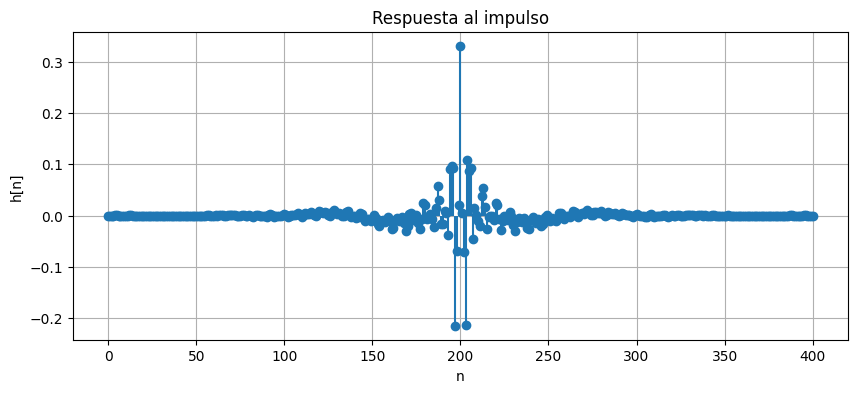

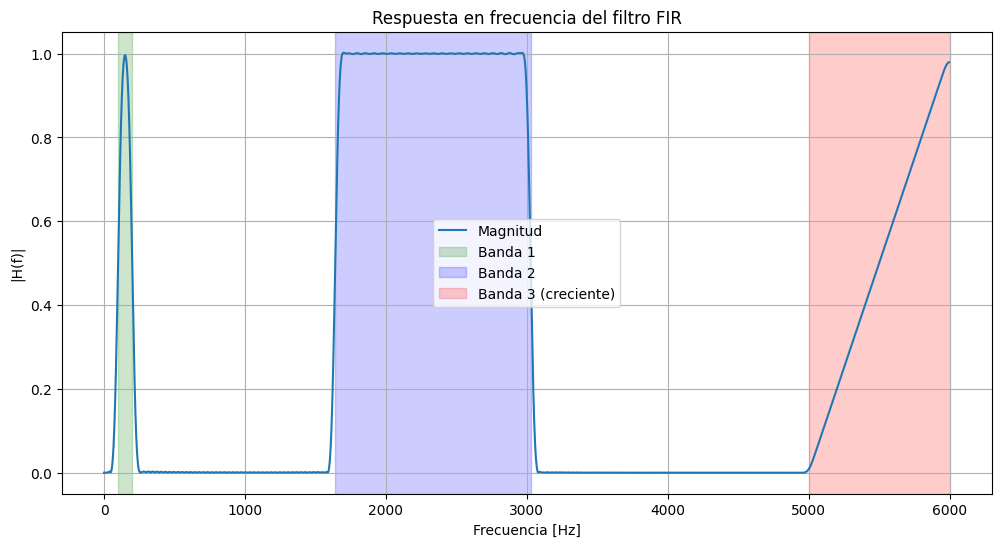

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Parámetros del diseño
fm = 12000      # Frecuencia de muestreo [Hz]
N = 401        # Longitud del filtro FIR
M = 10 * N       # Aumentamos la resolución en frecuencia
MTot = 2 * M + 1
df = fm / MTot   # Resolución en Hz -> Delta F

# Vector de frecuencias positivas con paso df
f = np.arange(M+1) * df

# Inicializamos la magnitud deseada en 0
MD = np.zeros_like(f)

# --- Primera banda de paso [100, 200] Hz ---
b1 = np.logical_and(f >= 100, f <= 200) # -> Valores entre 100 y 200
MD[b1] = 1

# --- Segunda banda de paso [1640, 3028] Hz ---
b2 = np.logical_and(f >= 1640, f <= 3028)
MD[b2] = 1

# --- Tercera banda de paso [5000, 6000] Hz con magnitud creciente ---
b3 = np.logical_and(f >= 5000, f <= 6000)
MD[b3] = (f[b3] - 5000) / (6000 - 5000)  # magnitud lineal desde 0 a 1

# Fase lineal: retardo de (N−1)/2
phi = np.exp(-1j * 2 * np.pi * ((N - 1) / 2) * np.arange(M + 1) / MTot)

# Respuesta en frecuencia positiva
R = MD * phi

# Completar la respuesta conjugada simétrica (parte negativa)
R_full = np.concatenate([R, np.conj(R[-2:0:-1])])

# Obtener respuesta al impulso
h = np.real(np.fft.ifft(R_full))

# Aplicar ventana (ej: Hamming)
h_windowed = h[:N] * np.hamming(N)

# Ver respuesta al impulso
plt.figure(figsize=(10, 4))
plt.stem(h_windowed, basefmt=" ")
plt.title("Respuesta al impulso")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)

# Respuesta en frecuencia
w, H = freqz(b=h_windowed,a=1, worN=2048, fs=fm)

plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(H), label="Magnitud")
plt.title("Respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|H(f)|")
plt.grid(True)
plt.axvspan(100, 200, color='g', alpha=0.2, label="Banda 1")
plt.axvspan(1640, 3028, color='b', alpha=0.2, label="Banda 2")
plt.axvspan(5000, 6000, color='r', alpha=0.2, label="Banda 3 (creciente)")
plt.legend()
plt.show()


## Conclusiones Ejercicio 2:
Definición de la **Resolución frecuencial**: 
$\Delta f = df = \dfrac{f_m}{2M+1}$

Donde:
- $M + 1$ es la cantidad de puntos de frecuencia que generamos en la parte positiva del espectro (incluyendo la frecuencia 0).